# Gradient Boost Regressor - Baseline Model

### STEP 1: IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import xgboost
import math
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from __future__ import division
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_squared_error
from time import time
from sklearn.metrics import r2_score
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Import dataset

data = pd.read_csv('kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# Copying data to another dataframe df_train for our convinience so that original dataframe remain intact.
df_train=data.copy()
df_train.rename(columns ={'price': 'SalePrice'}, inplace =True)

In [8]:
df_train.head()

,id,date,SalePrice,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### STEP 2: DATA CLEANING AND PREPROCESSING

In [9]:
print(len(data))

print('='*150)
# Check the number of features in the data set
print(len(data.columns))

print('='*150)
# Check the data types of each column
print(data.dtypes)

21613
21
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [10]:
# Check any number of columns with NaN or missing values
print(data.isnull().any().sum(), ' / ', len(data.columns))

0  /  21


In [11]:
# Check any number of data points with NaN
print(data.isnull().any(axis=1).sum(), ' / ', len(data))

0  /  21613


### STEP 3 : FINDING CORRELATION

In [12]:
# As id and date columns are not important to predict price so we are discarding it for finding correlation
features = data.iloc[:,3:].columns.tolist()
target = data.iloc[:,2].name

In [15]:
# Finding Correlation of price with other variables to see how many variables are strongly correlated with price
correlations = {}
for f in features:
    data_temp = data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [16]:
# Printing all the correlated features value with respect to price which is target variable
# Checking Corelation with price
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_living vs price,0.702035
grade vs price,0.667434
sqft_above vs price,0.605567
sqft_living15 vs price,0.585379
bathrooms vs price,0.525138
view vs price,0.397293
sqft_basement vs price,0.323816
bedrooms vs price,0.308350
lat vs price,0.307003
waterfront vs price,0.266369


### STEP 4 : EDA or DATA VISUALIZATION

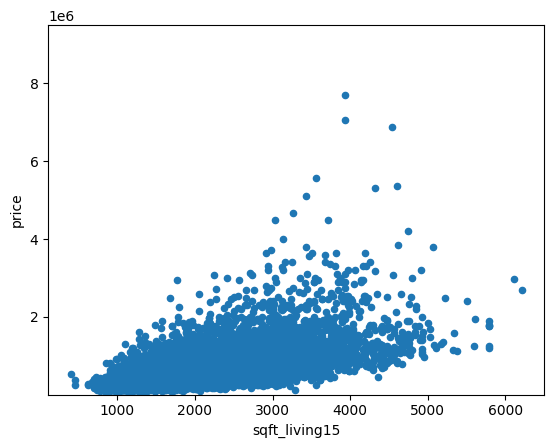

In [17]:
var = 'sqft_living15'
data = pd.concat([data['price'], data[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(3,9500000));

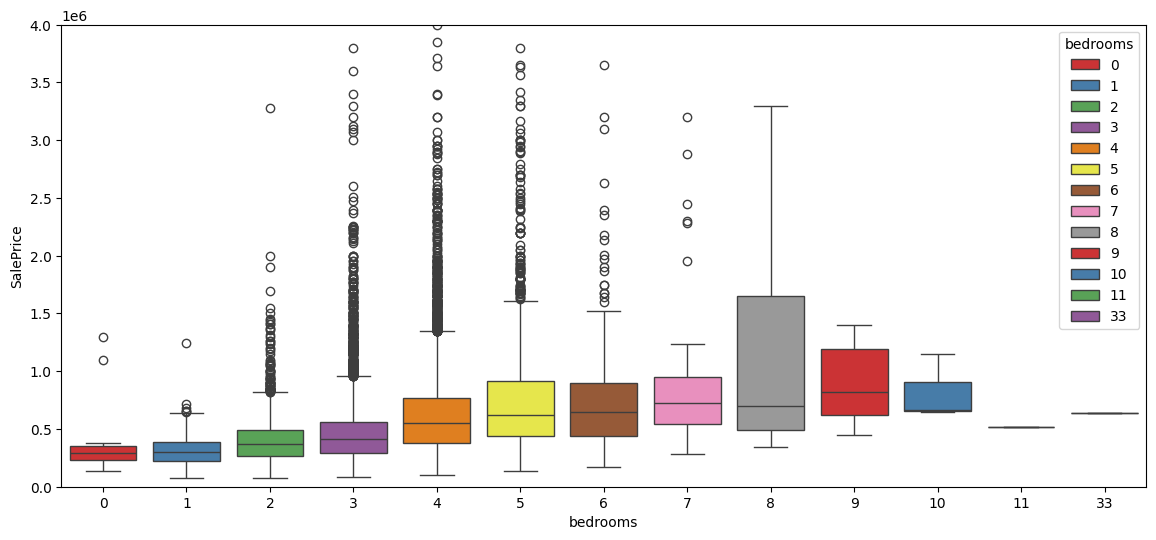

In [24]:
var = 'bedrooms'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data , palette = 'Set1' , hue='bedrooms')
fig.axis(ymin=0, ymax=4000000);

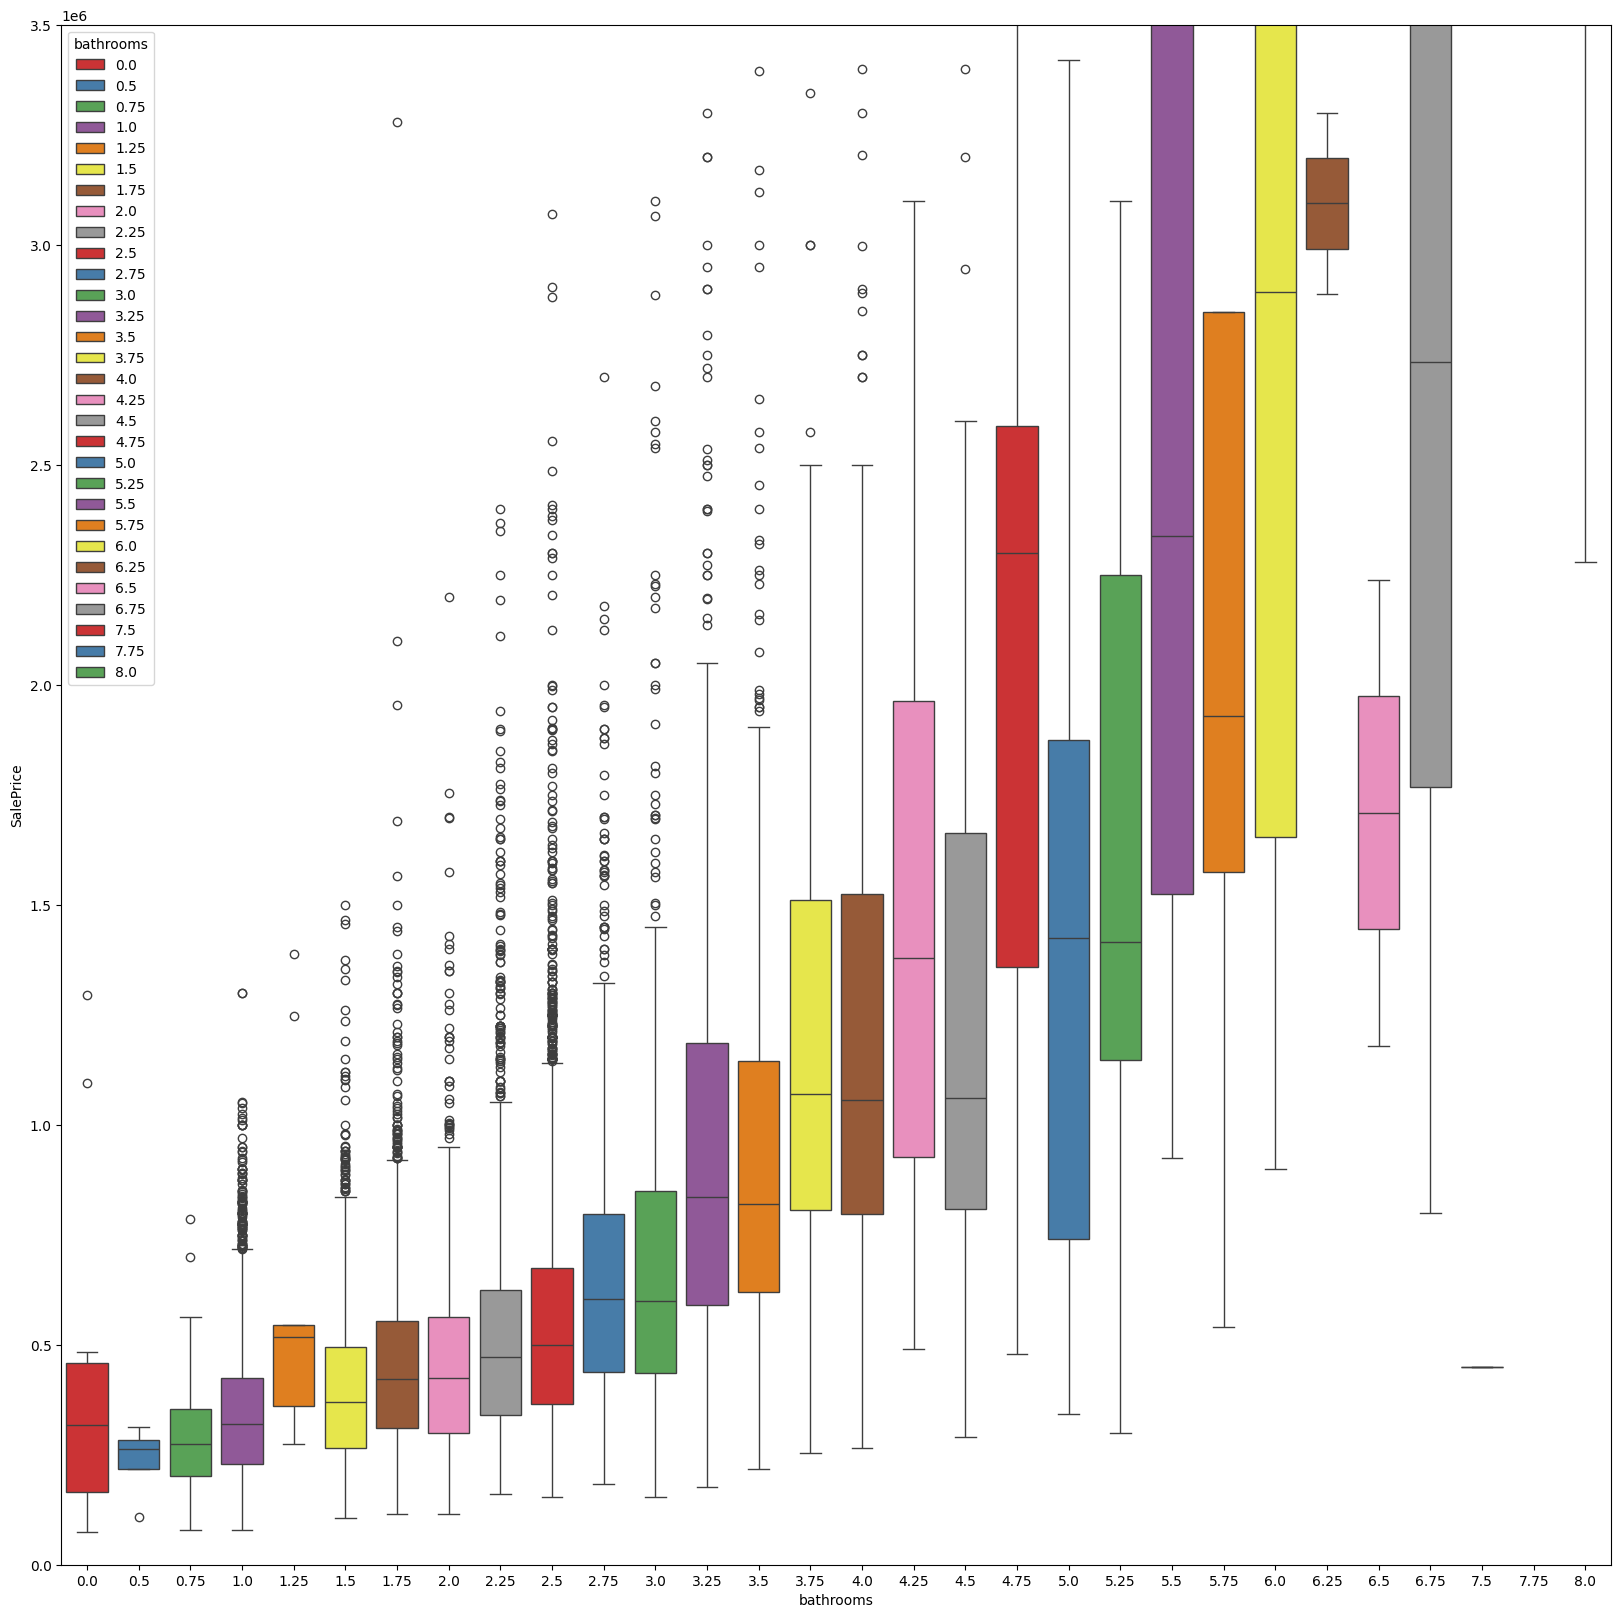

In [25]:
var = 'bathrooms'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y="SalePrice", data=data , palette = 'Set1' , hue='bathrooms')
fig.axis(ymin=0, ymax=3500000);

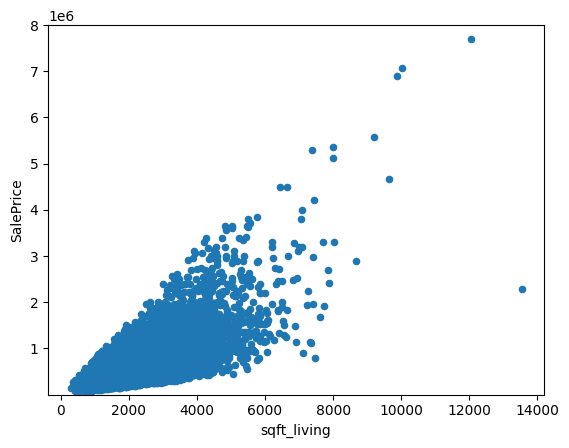

In [26]:
var = 'sqft_living'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(3,8000000));

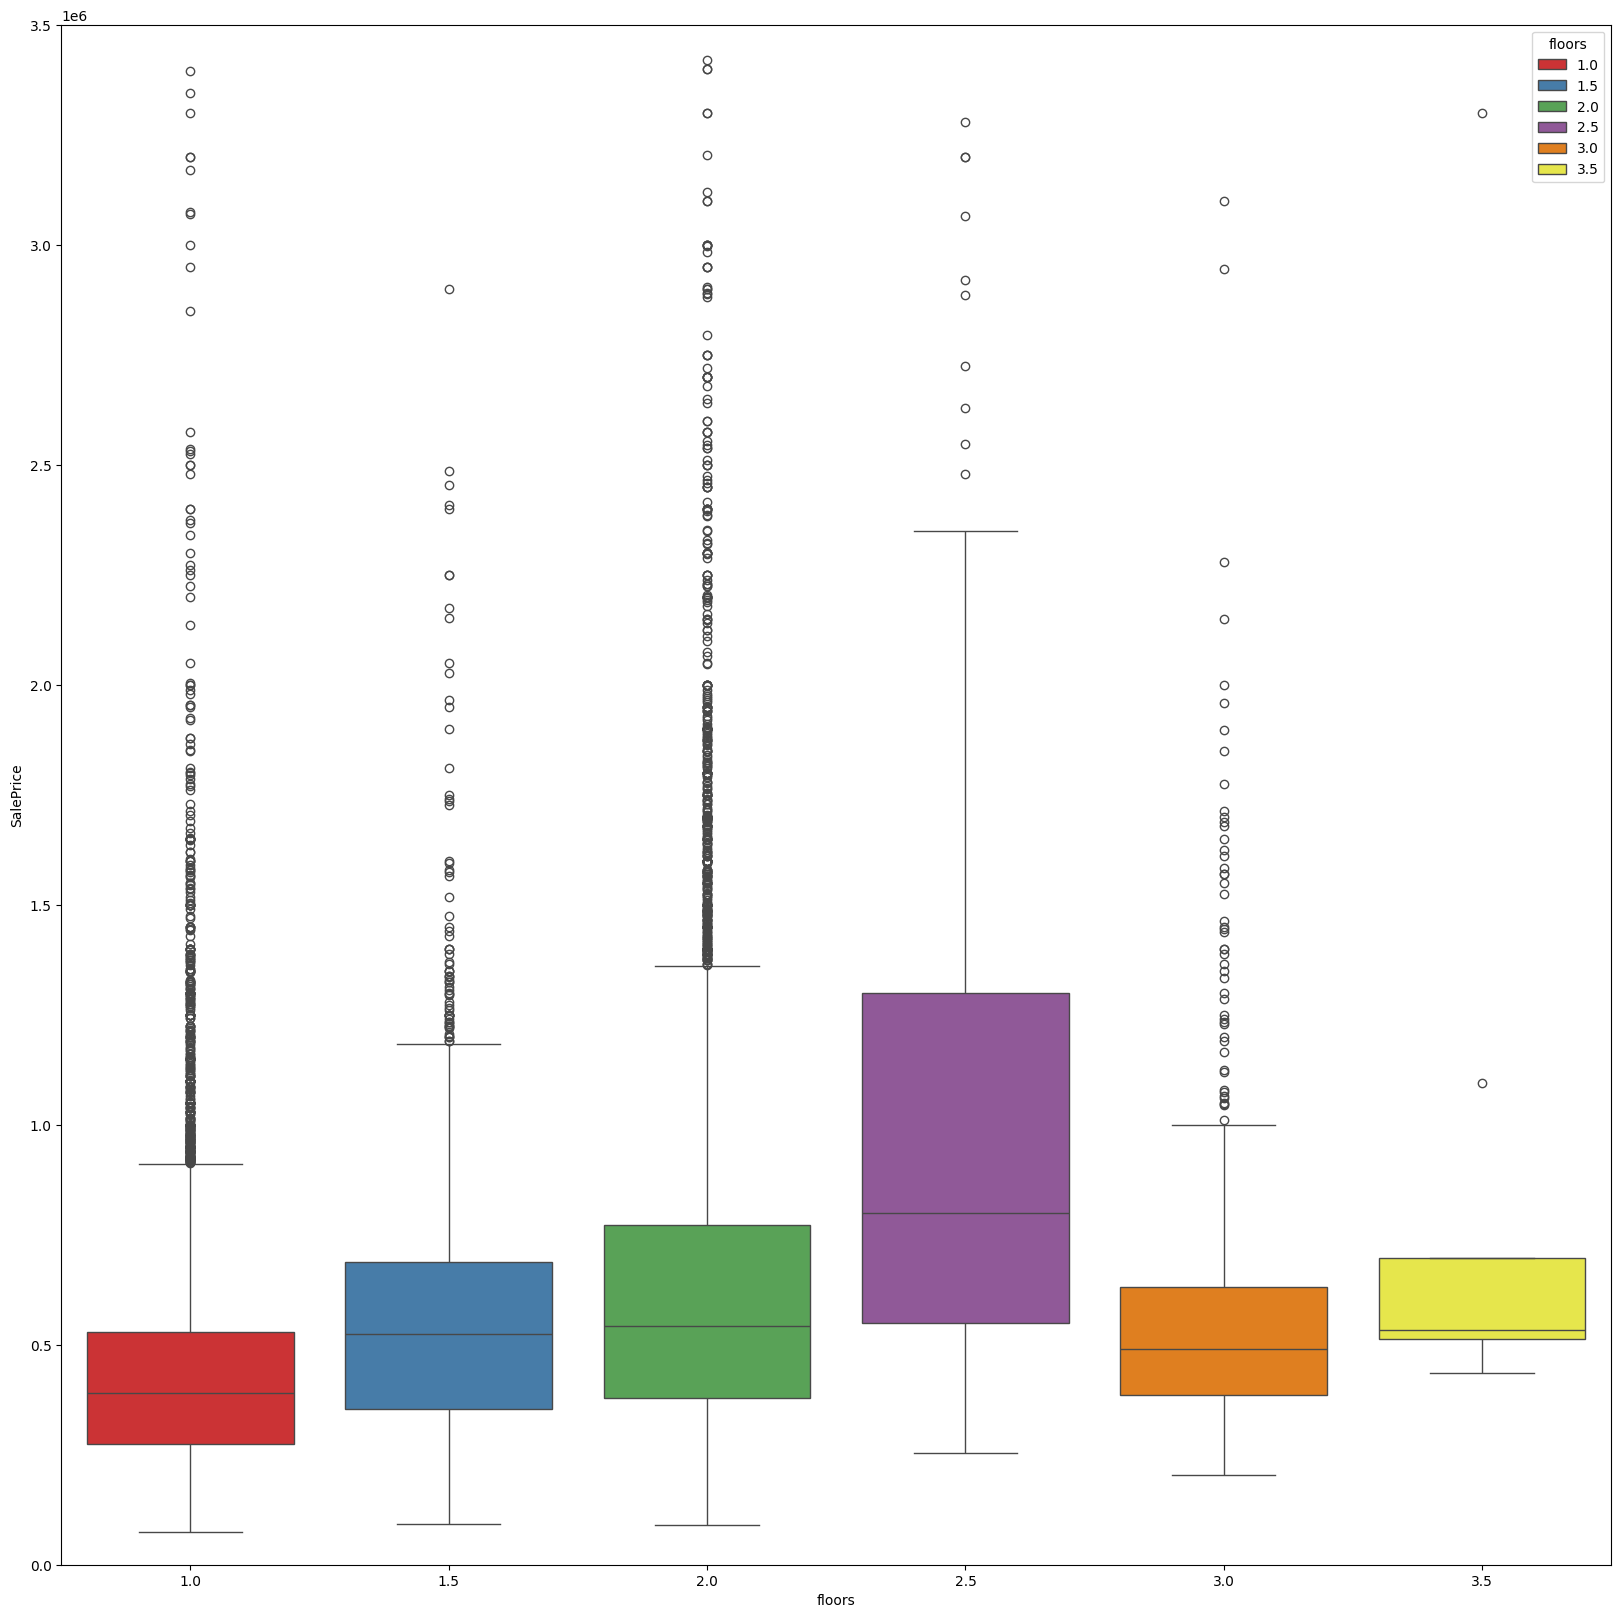

In [27]:
var = 'floors'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y="SalePrice", data=data , palette='Set1' , hue='floors')
fig.axis(ymin=0, ymax=3500000);

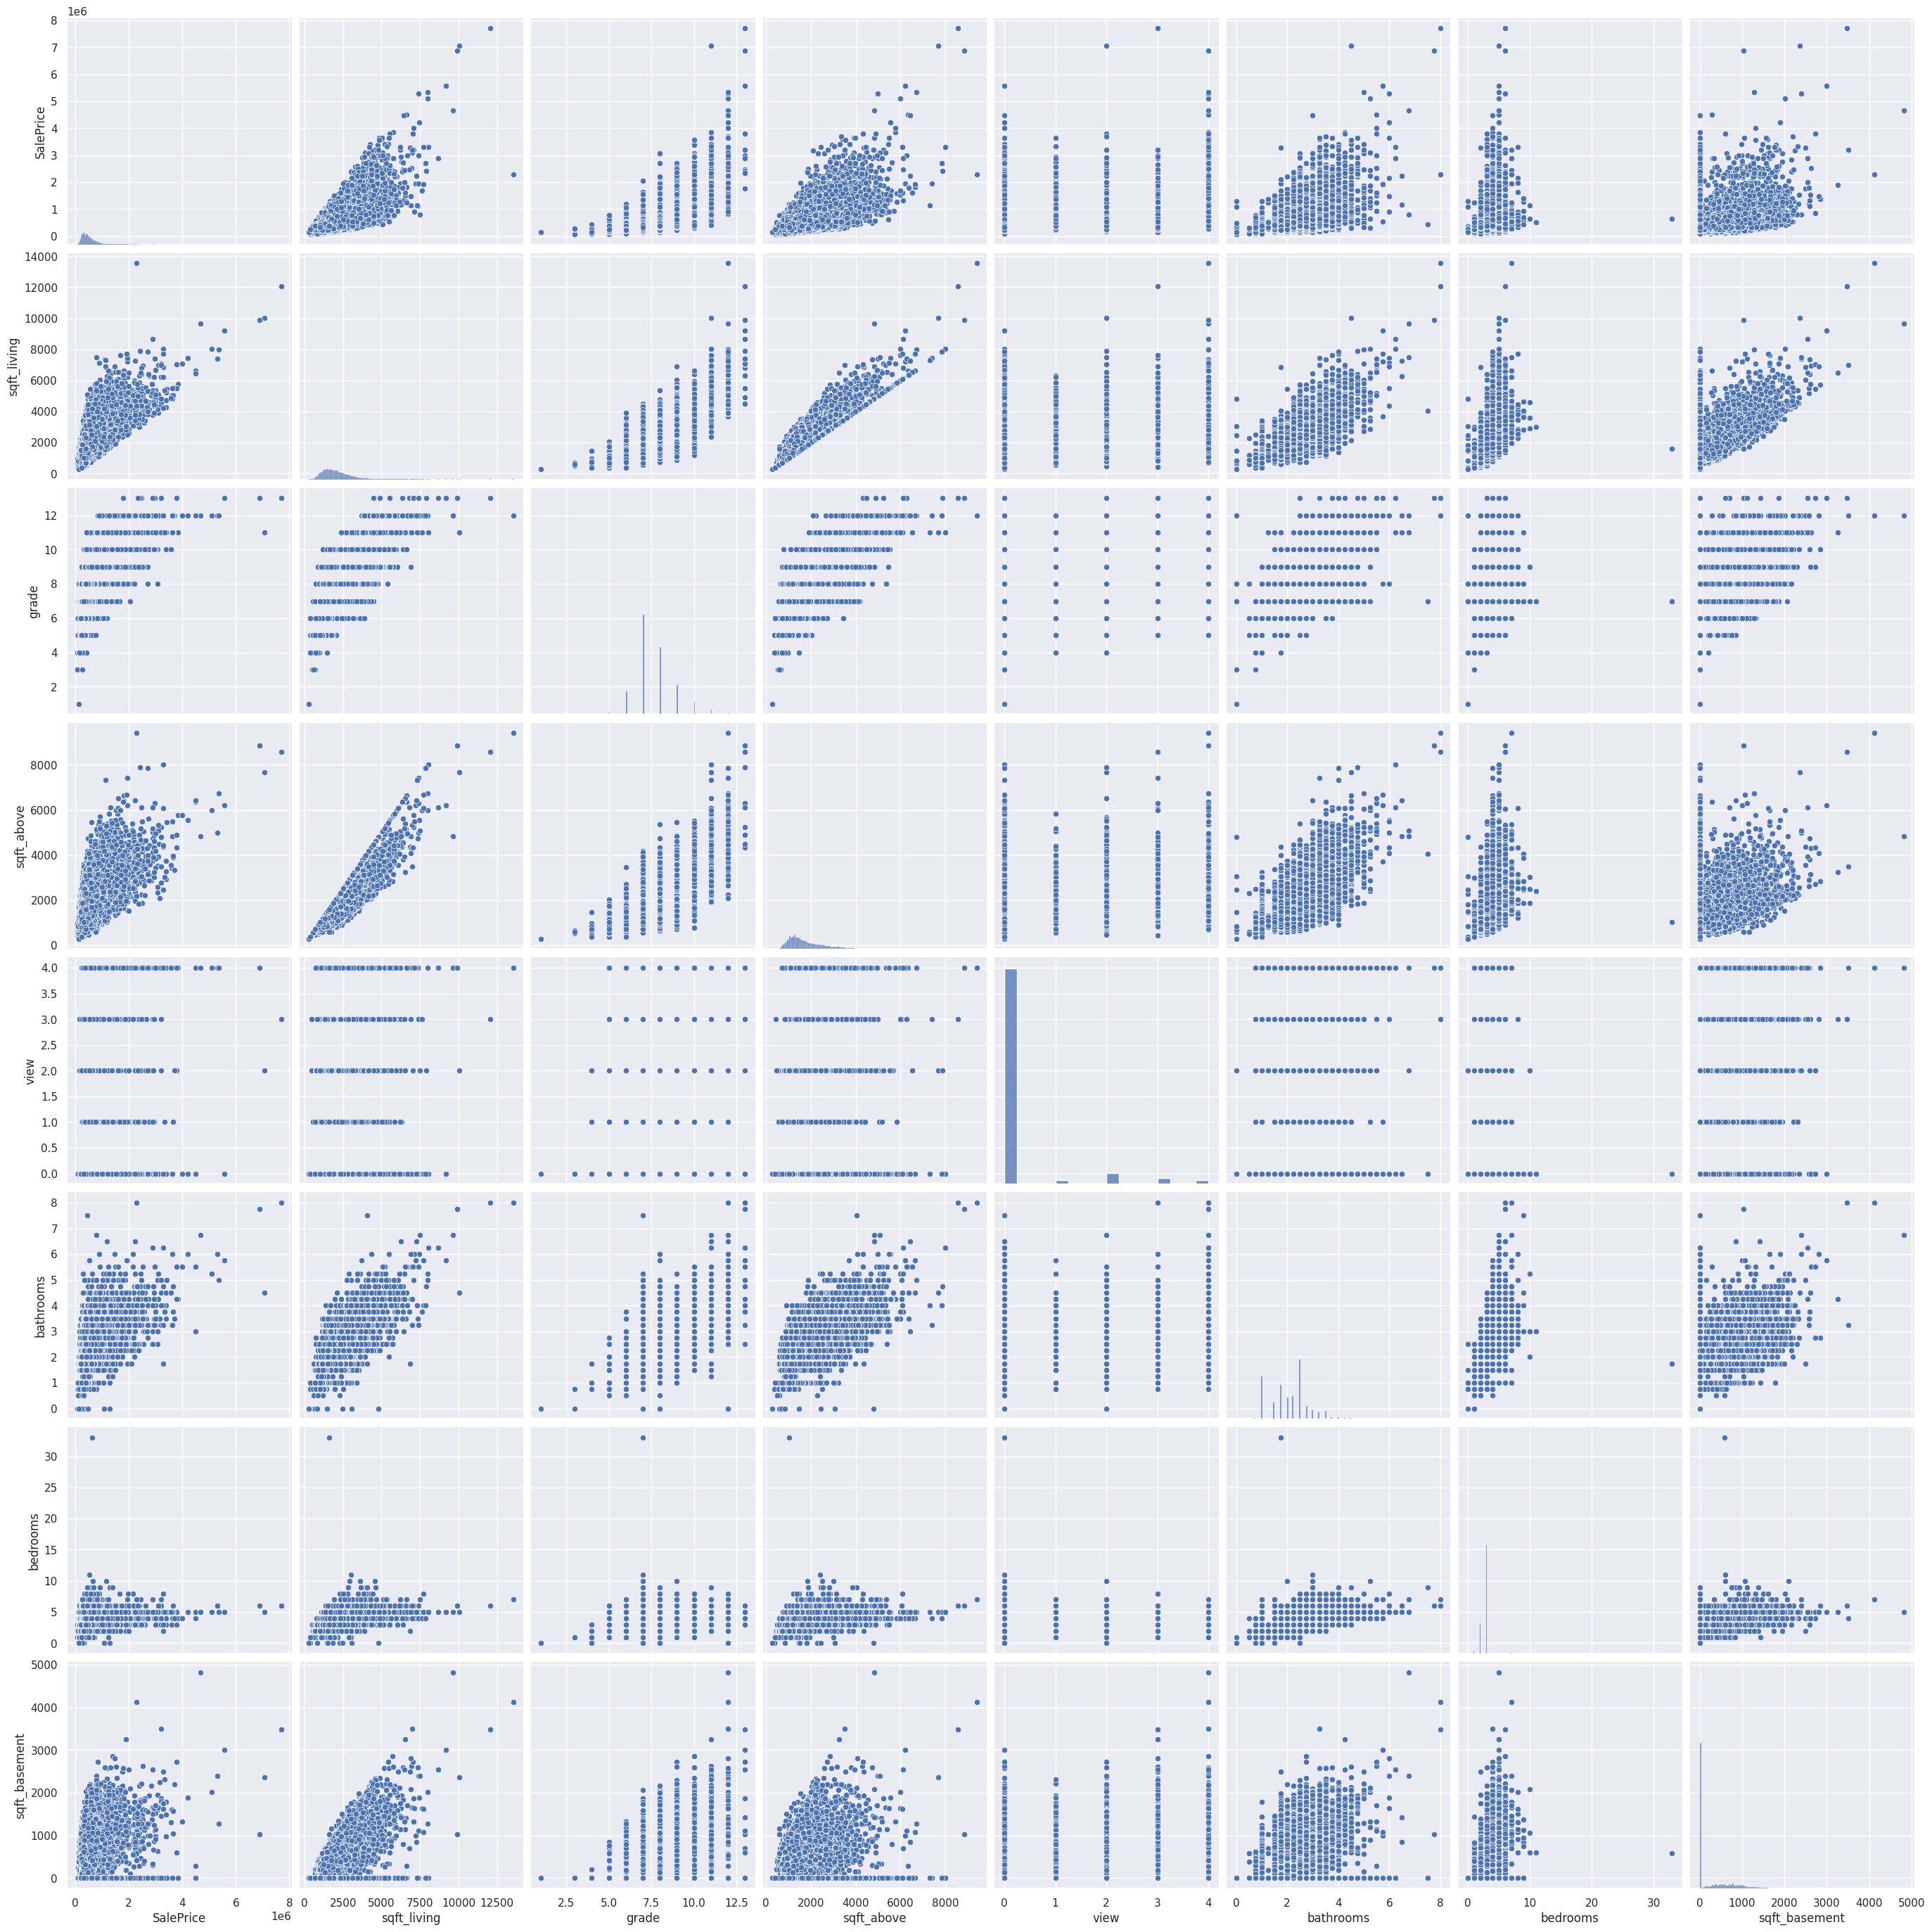

In [28]:
#Pairplots to visualize strong correlation
sns.set()
cols = ['SalePrice', 'sqft_living', 'grade', 'sqft_above', 'view', 'bathrooms','bedrooms','sqft_basement']
sns.pairplot(df_train[cols], height = 3.5)
plt.show();

In [29]:
df_train.dtypes

,0
id,int64
date,object
SalePrice,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


In [30]:
filtered_data = df_train[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','waterfront','yr_built','lat','bedrooms','long']]

In [47]:
X = df_train[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','waterfront','yr_built','lat','bedrooms','long']]
y = df_train[['SalePrice']]

In [48]:
X.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,waterfront,yr_built,lat,bedrooms,long
0,1180,7,1180,1340,1.00,0,0,0,1955,47.5112,3,-122.257
1,2570,7,2170,1690,2.25,0,400,0,1951,47.7210,3,-122.319
2,770,6,770,2720,1.00,0,0,0,1933,47.7379,2,-122.233
3,1960,7,1050,1360,3.00,0,910,0,1965,47.5208,4,-122.393
4,1680,8,1680,1800,2.00,0,0,0,1987,47.6168,3,-122.045


In [49]:
y.head()

,SalePrice
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


### STEP 5 : SPLITTING DATA INTO TRAINING AND TESTING SET

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [51]:
X_train.shape , X_test.shape

((17290, 12), (4323, 12))

### STEP 6: APPLYING MACHINE LEARNING MODEL

# GBM Regression

The most important parameters -

1. loss - Loss function to be optimized. By default ‘ls’ refers to least squares regression

2. learning_rate - Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators

3. n_estimators - No of estimators or Trees

4. min_samples_leaf - The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression

5. min_samples_split - The minimum number of samples required to split an internal node

6. subsample - The fraction of samples to be used for fitting the individual base learners

In [52]:
gbm = GradientBoostingRegressor().fit(X_train, y_train)

pred = gbm.predict(X_test)

r2score = r2_score(pred,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [53]:
pred

array([ 569367.21004044, 1399620.25364803,  412450.87317167, ...,
        349700.51077575,  479715.94924579,  350847.44782064])

In [54]:
# Calculating R2 Score
r2score

0.8473680566642104

In [55]:
# Calculating Mean Sqaured Error & Root Mean Squared Error
mse = mean_squared_error(y_test, pred)

rmse = math.sqrt(mse)

print(rmse)

128779.60216075461


In [56]:
gbm.feature_importances_

array([0.30691164, 0.30589386, 0.01745895, 0.02940196, 0.00453751,
       0.02481885, 0.00256514, 0.0367341 , 0.03311127, 0.16502643,
       0.00112997, 0.07241031])

In [57]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400 #high res figures
import shap

In [58]:
%time explainer = shap.explainers.Tree(gbm, data=X_test)

CPU times: user 9.43 ms, sys: 974 µs, total: 10.4 ms
Wall time: 9.6 ms


In [59]:
%time shap_values = explainer(X_test)

CPU times: user 4.83 s, sys: 20 ms, total: 4.85 s
Wall time: 4.83 s


In [60]:
shap_values

.values =
array([[  -8925.85928711,  -84506.57339935,  -19446.9201297 , ...,
          93347.64738464,   -6115.96635559,   25534.70434418],
       [ 358565.41359802,  123247.95939423,   22283.35394104, ...,
         190043.1753714 ,   -6360.93020447,   85097.69736694],
       [ -46601.03109253,  -67288.58559296,   -7085.04982117, ...,
           1805.27463638,     709.55500854,   15503.5592807 ],
       ...,
       [ -42224.77816315,  -92153.21224487,   12310.17245728, ...,
        -103422.93280792,     696.19459351,   -9093.32283234],
       [  30393.24891418,   86554.37754669,    6895.39729095, ...,
        -172358.13434174,    1346.85212158,   -4831.4888443 ],
       [ -11400.00971252,  -76248.07870209,   15964.4799176 , ...,
        -126162.20308441,     609.12346375,    7205.12962341]])

.base_values =
array([561353.71208316, 561353.71208316, 561353.71208316, ...,
       561353.71208316, 561353.71208316, 561353.71208316])

.data =
array([[ 2.13000e+03,  7.00000e+00,  1.27000e+03, 

In [61]:
X_test

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,waterfront,yr_built,lat,bedrooms,long
9365,2130,7,1270,1710,2.00,0,860,0,1926,47.5750,5,-122.388
21141,4390,9,3170,2740,3.50,3,1220,0,2013,47.6789,5,-122.273
19204,1670,7,1670,1620,1.75,0,0,0,1976,47.7254,4,-122.310
20439,2510,9,2510,2510,3.25,0,0,0,2003,47.4785,4,-122.228
15727,3040,9,1760,2420,2.75,3,1280,0,1958,47.4488,6,-122.356
...,...,...,...,...,...,...,...,...,...,...,...,...
17950,1690,7,1690,1530,1.75,0,0,0,1987,47.4719,3,-122.191
4221,1730,7,1330,2100,2.50,0,400,0,1991,47.4099,3,-122.329
10617,1910,6,1910,2590,2.50,0,0,0,1963,47.4918,4,-122.141
17911,2740,9,2740,2290,4.00,0,0,0,1990,47.3735,4,-122.156


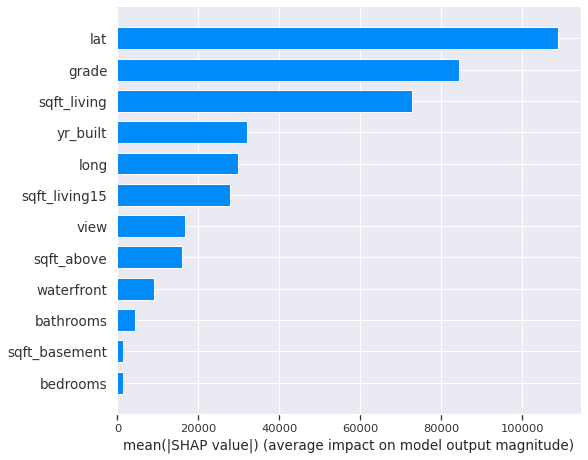

CPU times: user 281 ms, sys: 98.7 ms, total: 380 ms
Wall time: 396 ms


In [62]:
%%time
mpl.rcParams['figure.dpi'] = 75
shap.summary_plot(shap_values.values, X_test , plot_type='bar')